In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip
mpl.style.use('ggplot')
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [2]:
np.random.seed(20180701)

## A Theoretical Distribution

In [3]:
std_norm = sp.stats.norm(loc=0, scale=1)
# rvs: random variable sample
std_norm_rvs = std_norm.rvs(size=1000)

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


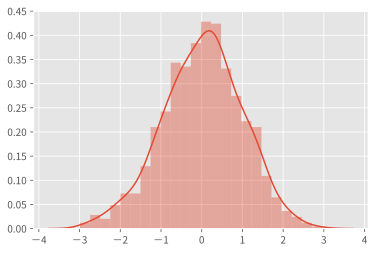

In [4]:
sns.distplot(std_norm_rvs)

### An Observed Value

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


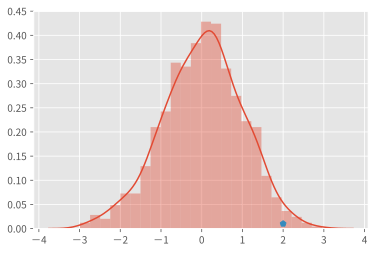

In [5]:
ov = 2
sns.distplot(std_norm_rvs)
plt.plot(ov, 0.01, 'p')

### The Probability of the “Tail”

Given the theoretical distribution, the probability of more extreme values than the observed value  
= P(more extreme values | the theoretical distribution)  
= P(the tail | the theoretical distribution)

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


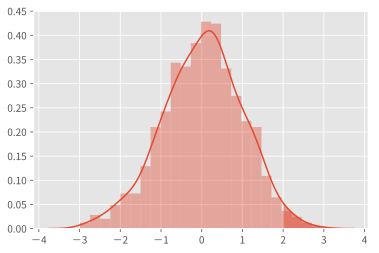

In [6]:
ax = sns.distplot(std_norm_rvs)
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=kde_x>ov, alpha=0.5)

P(the tail | the theoretical distribution)  
:= P(X > x | std norm)
    
See [the formal definition of the p-value](https://en.wikipedia.org/wiki/P-value#Definition_and_interpretation).

The probability functions:

- pdf(x) -> P(X=x)  # probability density function
- cdf(x) -> P(X≤x)  # cumulative distribution function
- sf(x) -> P(X>x)  # survival function = 1 - cdf(x)

In [7]:
std_norm.sf(ov)

0.022750131948179195

## Transform a Sample Into the Theoretical Distribution

In [8]:
# sample := a sample is a collection of units from a population
# unit := a member of population
# ref: https://www.stat.berkeley.edu/~stark/SticiGui/Text/gloss.htm
sample = sp.stats.norm.rvs(loc=170, scale=5, size=100)

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


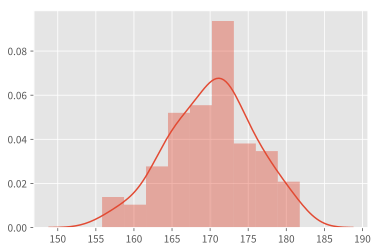

In [9]:
sns.distplot(sample)

In [10]:
# sm: sample mean
sm = sample.mean()

# ss: sample standard deviation
# ddof: delta degrees of freedom, must be 1 to get unbiased estimation of a standard deviation from a sample
# ref: https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation & https://devdocs.io/numpy~1.12/generated/numpy.std
ss = sample.std(ddof=1)

# rs: raw score
rs = 170

# “standardize” the unit value to z-score (= z-value = z-statistic)
# https://en.wikipedia.org/wiki/Standard_score#Standardizing_in_mathematical_statistics
z_score = (rs - sm) / (ss / np.sqrt(1))
z_score

-0.028894108557839783

In [11]:
std_norm.sf(z_score)

0.5115254778242518

In [12]:
(sample[0] - sm) / (ss / np.sqrt(1))

-2.18918019300502

In [13]:
sp.stats.zscore(sample, ddof=1)[0]

-2.18918019300502

In [14]:
(sample[0] - sm) / (ss / np.sqrt(1)) == sp.stats.zscore(sample, ddof=1)[0]

True